# Convolutional Neural Networks (CNN) for MNIST / Fashion MNIST

In this project, we ask you to implement CNN for classification of handwritten images

## Tasks
1. Find out how to compute accuracy. Note that if you have a prediction for given image, the predicted class is the argmax of the output. Implement a function which can compute accuracy for our model
2. Change the NeuralNet class by changing the 2 fully connected to convolutional layers (using Conv2d function). Let's use following network (Google and discuss how to do it):

nn.Conv2d(1, 16, 5)

ReLU

MaxPool with kernel size 2 and stride 2

nn.Conv2d(16, 32, 5)

ReLU

MaxPool with kernel size 2 and stride 2

Fully Connected to num_classes

3. Train the model for e.g. 10 epochs. How was training and testing accuracy changing over the course of training? Note that the training accuracy is not the mini-batch accuracy!


In [1]:
import torch, torchvision
import torch.nn as nn
#import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline  

In [2]:
# Download the dataset if you are using for the first time
TrainData = torchvision.datasets.MNIST("../Datasets/MNIST", train=True,transform=transforms.ToTensor(),download = False)
TestData = torchvision.datasets.MNIST("../Datasets/MNIST", train=False,transform=transforms.ToTensor(),download = False)

print ("Size of training dataset:", len(TrainData.train_data))
print ("Size of testing dataset:", len(TestData.test_data))        

Size of training dataset: 60000
Size of testing dataset: 10000


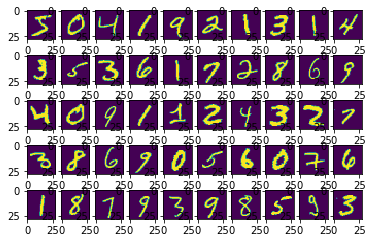

In [3]:
for i in range(50):
    image = TrainData.train_data[i]   
    plt.subplot(5,10,i+1)
    plt.imshow(image)

In [47]:
# we choose some hyper-parameters
num_classes = 10
num_epochs = 1
batch_size = 100
learning_rate = 0.001

In [62]:
class NeuralNet(nn.Module):
    def __init__(self,num_classes):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32*4*4, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.pool(out)
        flat = torch.reshape(out,[-1,32*4*4])
        out = self.fc(flat)
        return out

In [63]:
model = NeuralNet(num_classes)#.to_device

In [64]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=TrainData, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [65]:
for (images, labels) in  train_loader:
    print(images.shape)
    outputs = model.forward(images)  # you can use also just  "outputs = model(images)"
    print(outputs.shape)
    print(labels)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100, 10])
tensor([5, 1, 1, 2, 6, 9, 0, 8, 4, 3, 1, 7, 2, 3, 2, 7, 5, 9, 3, 4, 9, 6, 6, 6,
        2, 3, 9, 4, 0, 1, 4, 7, 6, 1, 1, 9, 8, 9, 2, 6, 2, 5, 2, 2, 0, 6, 4, 8,
        3, 8, 8, 0, 4, 8, 6, 6, 4, 1, 2, 6, 4, 3, 2, 9, 6, 4, 1, 9, 4, 0, 2, 8,
        1, 9, 7, 8, 0, 5, 4, 7, 2, 9, 0, 0, 5, 3, 4, 9, 3, 8, 5, 7, 5, 6, 7, 7,
        9, 1, 8, 6])


In [66]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [67]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images #.to_device
        labels = labels #.to_device
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()  # this will reset gradients to 0
        loss.backward() # computes gradients of the loss function
        optimizer.step() # applies the gradients to the parameters to improve our prediction
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Mini-Batch Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/1], Step [100/600], Mini-Batch Loss: 2.2991
Epoch [1/1], Step [200/600], Mini-Batch Loss: 2.2724
Epoch [1/1], Step [300/600], Mini-Batch Loss: 2.2532
Epoch [1/1], Step [400/600], Mini-Batch Loss: 2.2549
Epoch [1/1], Step [500/600], Mini-Batch Loss: 2.2179
Epoch [1/1], Step [600/600], Mini-Batch Loss: 2.1996


In [68]:
test_loader = torch.utils.data.DataLoader(dataset=TestData, 
                                           batch_size=batch_size, 
                                           shuffle=False)

In [69]:
# Calculate Test loss
test_zero_one_loss=0.0
for i, (images, labels) in enumerate(test_loader):
    images = images
    labels = labels 
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    test_zero_one_loss += sum((predicted != labels).float())
    
print ('The error on test set is {}%'.format(test_zero_one_loss.item()/len(TestData.test_data)))

The error on test set is 0.4799%
